# import

In [4]:
import openpyxl
import math
import matplotlib.pyplot as plt
import numpy
from scipy.stats import expon
import random

# Загрузка данных из .xlsx

In [50]:
default_path = '3302_Kalugina_Sarzhevskiy.xlsx'

path = input('Введите путь к .xlsx таблице (оставьте пустым для загрузки из таблицы по умолчанию): ')

wb = openpyxl.load_workbook(default_path) if path == '' else openpyxl.load_workbook(path)
sh = wb.active

input_data = []

for i in range(1, 301):
    input_data.append(float(sh.cell(row=i, column=1).value))

if path == '':
    print(f"Загружена трасса из {len(input_data)} чисел из файла {default_path}")
else:
    print(f"Загружена трасса из {len(input_data)} чисел из файла {path}")

Введите путь к .xlsx таблице (оставьте пустым для загрузки из таблицы по умолчанию): result.xlsx
Загружена трасса из 300 чисел из файла result.xlsx


# Оценки основных характеристик посдедовательности

In [51]:
student_test_coef = {
    0.90: 1.643,
    0.95: 1.960,
    0.99: 2.580
}

def compute_characteristics_for_n_values(n):
    expected_value = sum(input_data[:n]) / n
    print(f"Оценка математического ожидания для {n} элементов: {expected_value}")

    dispersion = sum([(x - expected_value)**2 for x in input_data[:n]]) / (n - 1)
    print(f"Оценка диперсии для {n} элементов: {dispersion}")

    standard_deviation = math.sqrt(dispersion)
    print(f"Оценка среднеквадратического отклонения для {n} элементов: {standard_deviation}")
    
    variation = standard_deviation / expected_value
    print(f"Оценка коэффициента вариации для {n} элементов: {variation}")
    
    epsilon_90 = student_test_coef[0.90] * standard_deviation
    print(f"Эпсилон 0.90 ({n} элементов): {epsilon_90}")
    
    epsilon_95 = student_test_coef[0.95] * standard_deviation
    print(f"Эпсилон 0.95 ({n} элементов): {epsilon_95}")
    
    epsilon_99 = student_test_coef[0.99] * standard_deviation
    print(f"Эпсилон 0.99 ({n} элементов): {epsilon_99}")
    
    return [expected_value, dispersion, standard_deviation, variation, epsilon_90, epsilon_95, epsilon_99]
    
c_10 = compute_characteristics_for_n_values(10)
print()
c_50 = compute_characteristics_for_n_values(50)
print()
c_100 = compute_characteristics_for_n_values(100)
print()
c_200 = compute_characteristics_for_n_values(200)
print()
c_300 = compute_characteristics_for_n_values(300)

# TODO: print table

Оценка математического ожидания для 10 элементов: 0.9054414408519186
Оценка диперсии для 10 элементов: 2.49700987395335
Оценка среднеквадратического отклонения для 10 элементов: 1.5801929863005182
Оценка коэффициента вариации для 10 элементов: 1.745218315624845
Эпсилон 0.90 (10 элементов): 2.596257076491751
Эпсилон 0.95 (10 элементов): 3.0971782531490155
Эпсилон 0.99 (10 элементов): 4.076897904655337

Оценка математического ожидания для 50 элементов: 0.7484011287424491
Оценка диперсии для 50 элементов: 0.9077755503684927
Оценка среднеквадратического отклонения для 50 элементов: 0.9527725596219134
Оценка коэффициента вариации для 50 элементов: 1.27307739530387
Эпсилон 0.90 (50 элементов): 1.5654053154588037
Эпсилон 0.95 (50 элементов): 1.8674342168589504
Эпсилон 0.99 (50 элементов): 2.4581532038245366

Оценка математического ожидания для 100 элементов: 1.0237678163688635
Оценка диперсии для 100 элементов: 2.451452049676938
Оценка среднеквадратического отклонения для 100 элементов: 1.565

# График заданной последовательности

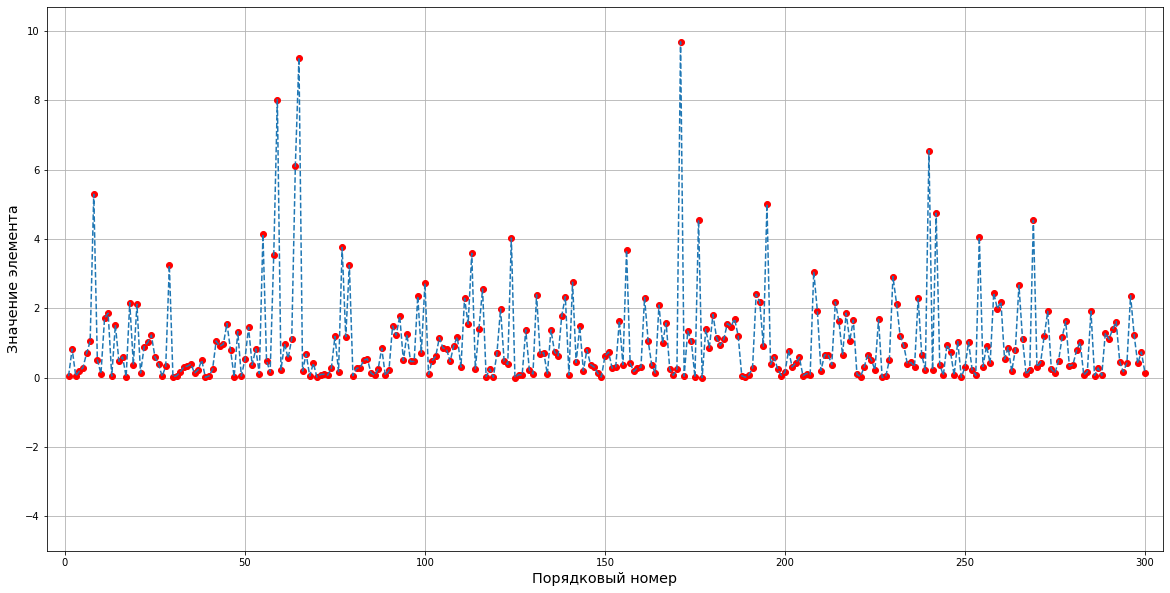

In [52]:
x_border = (-5, 305)
y_border = (min(input_data) - 5, max(input_data) + 1)

plt.figure(figsize=(20, 10))
plt.plot(range(1, 301), input_data, 'ro', range(1, 301), input_data, '--')

ax = plt.gca()
ax.set_autoscale_on(False)
ax.axis([x_border[0], x_border[1], y_border[0], y_border[1]])

plt.ylabel('Значение элемента', fontsize='x-large')
plt.xlabel('Порядковый номер', fontsize='x-large')

plt.grid()
plt.show()

# Расчет коэффициента автокорреляции

In [53]:
def compute_autocorrelation(n):
    x_data = input_data[:(len(input_data) - n)]
    y_data = input_data[n:]
    
    m_1 = sum(x_data) / len(x_data)
    m_2 = sum(y_data) / len(y_data)
    
    autocorr_coef = sum([(x - m_1) * (y - m_2) for (x, y) in zip(x_data, y_data)]) / math.sqrt(sum([(x - m_1)**2 for x in x_data]) * sum([(y - m_2)**2 for y in y_data]))
    print(f"Коэффициент автокорреляции ({n}): {autocorr_coef}")
    
    return autocorr_coef

autocorr_coefs = []
for i in range(1, 11):
    autocorr_coefs.append(compute_autocorrelation(i))

Коэффициент автокорреляции (1): 0.008499545544374874
Коэффициент автокорреляции (2): 0.004939286480244951
Коэффициент автокорреляции (3): -0.041431576903503256
Коэффициент автокорреляции (4): 0.008714741694687415
Коэффициент автокорреляции (5): 0.049979607910697096
Коэффициент автокорреляции (6): 0.07649346276848172
Коэффициент автокорреляции (7): -0.05220462708339683
Коэффициент автокорреляции (8): -0.07438542710864758
Коэффициент автокорреляции (9): -0.008630108266028145
Коэффициент автокорреляции (10): 0.014792470274436777


# График коэффициентов автокорреляции

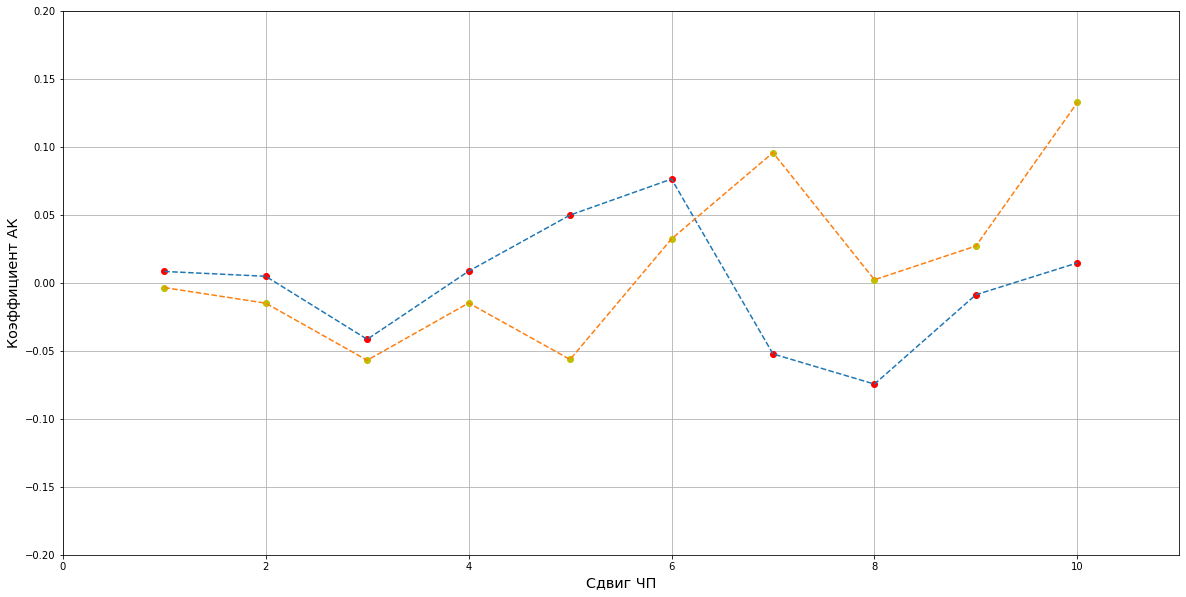

In [58]:
x_border = (0, 11)
y_border = (-0.2, 0.2)

a_c_original = [-0.0033663339856774502, -0.01484969928254023, -0.056866134871722054, -0.014721206933041618, -0.056271032132896415, 0.03246459146705559, 0.09593473151398874, 0.0023855025346994365, 0.02723066377808868, 0.13285968235271267]


plt.figure(figsize=(20, 10))
plt.plot(range(1, 11), autocorr_coefs, 'ro',
         range(1, 11), a_c_original, 'yo',
         range(1, 11), autocorr_coefs, '--',
         range(1, 11), a_c_original, '--')



ax = plt.gca()
ax.set_autoscale_on(False)
ax.axis([x_border[0], x_border[1], y_border[0], y_border[1]])
#plt.legend(('АК случайной последовательности', 'АК изначальной последовательности'), fontsize='x-large')
plt.ylabel('Коэффициент АК', fontsize='x-large')
plt.xlabel('Сдвиг ЧП', fontsize='x-large')

plt.grid()
plt.show()

# Гистограмма распределения частот

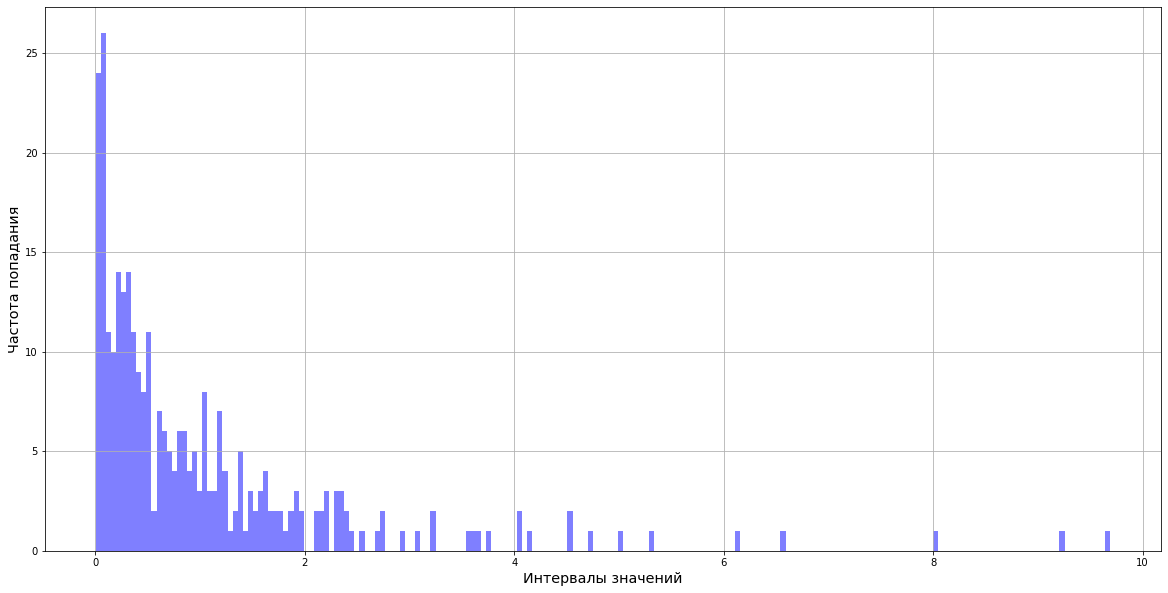

In [56]:
# TODO: find better way to compute num_intervals
#interval_len = (3.5 * c_300[2])/(300**(1./3.)) # Scott's formula
#num_intervals = int(max(input_data) / interval_len)
num_intervals = 200
plt.figure(figsize=(20, 10))
n, bins, patches = plt.hist(input_data, num_intervals, facecolor='blue', alpha=0.5)


#print(n)
#print(bins)

plt.ylabel('Частота попадания', fontsize='x-large')
plt.xlabel('Интервалы значений', fontsize='x-large')

plt.grid()
plt.show()

# Генерация новой последовательности

In [49]:
def generate_erlang():
    k = int((1/c_300[3])**2)
    m = c_300[0]
    n = 300
    print(f"Генерирую распределние Эрланга {k}-го порядка с матожиданием {m} ({n} величин)")
    return numpy.random.gamma(k, m / k, n)


def h2rnd(q, m1, m2, n):
    res = []
    for i in range(n):
        p = random.random()
        if p <= q:
            res.append(expon.rvs(scale=m1, size=1)[0])
        else:
            res.append(expon.rvs(scale=m2, size=1)[0])
    return res

def hyperexponential():
    n = len(input_data)
    v = c_300[3]
    m = c_300[0]
    q = (2 / (1 + v**2)) / 2
    m1 = m * (1 + math.sqrt(((1 - q)/ 2*q) * (v**2 - 1)))
    m2 = m * (1 - math.sqrt(((q)/(2 * (1 - q))) * (v**2 - 1)))
    return h2rnd(q, m1, m2, n)

normalized = [x for x in input_data if x < 8]
print(f"normalized mean = {sum(normalized) / len(normalized)}")


result = hyperexponential() if c_300[3] > 1 else generate_erlang()

for number in result:
    print(number)

normalized mean = 1.0270005932789494
0.6448986544002403
1.9376403171154426
0.05461819090709304
0.49161630026016395
0.2515041879983615
0.019505324773293423
0.2135325319454864
0.19321626891921242
1.2727319622679467
1.048889127955655
1.1727018141302317
0.8277815386625929
0.18048368384240068
0.14266371214714438
0.2516196669742155
0.4758652063002819
1.4878793935363033
0.4094843532415367
0.8641105328961229
1.8636484210860935
1.0970188187084708
0.7894469524308233
1.3611909007328358
0.5751685381084667
0.2970953225131318
0.1940156852128233
0.5421195421764615
0.30904001972368844
0.798229275544055
0.15819488798997716
0.42548161500012477
0.19507943393143123
0.09234485586910472
0.16313794402944087
0.2527335328316802
1.5684209549134311
0.14653388870095657
0.2839692724609857
9.465065090809404
0.03410661219051765
1.0243728155846301
0.025715367356071602
0.2502048424002437
0.517901803594735
0.9283605966609515
0.07405965459148584
0.7836433051001874
0.02371270452066431
0.7717487051445253
0.050875850046945